In [1]:
import base64
import sys
import pandas as pd
import numpy as np
from math import log10
from collections import Counter
from itertools import product
import wordninja

from bisect import bisect_left
from itertools import permutations

from matplotlib import pyplot as plt

from collections import defaultdict

In [2]:
%matplotlib inline

https://github.com/moosejuice/Cryptopals/tree/master/Set%201
https://laconicwolf.com/2018/06/30/cryptopals-challenge-6-break-repeating-key-xor/

https://github.com/rygao/cryptopals

# Task 0

In [3]:
file_task = open('task.txt', 'r')
encoded_str = file_task.read()

In [4]:
file_output = open('step1.txt', 'wb')
file_output.write(base64.b64decode(base64.b64decode(encoded_str)))
file_output.close()

# Task 1

In [5]:
task1 = ']|d3gaj3r3avcvrgz}t>xvj3K\A3pzc{va=3V=t=3zg3`{|f.w3grxv3r3`gaz}t31{v..|3d|a.w13r}w?3tzev}3g{v3xvj3z`31xvj1?3k|a3g{v3uza`g3.vggva31{13dzg{31x1?3g{v}3k|a31v13dzg{31v1?3g{v}31.13dzg{31j1?3r}w3g{v}3k|a3}vkg3p{ra31.13dzg{31x13rtrz}?3g{v}31|13dzg{31v13r}w3`|3|}=3J|f3~rj3f`v3z}wvk3|u3p|z}pzwv}pv?3[r~~z}t3wz`gr}pv?3Xr`z`xz3vkr~z}rgz|}?3`grgz`gzpr.3gv`g`3|a3d{rgveva3~vg{|w3j|f3uvv.3d|f.w3`{|d3g{v3qv`g3av`f.g='

In [6]:
charset = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789,.' + ' ' + '\''
charset_lower = 'abcdefghijklmnopqrstuvwxyz'

In [7]:
def score(text):    
    score = 0
    for s in text:
        score = score + 1 if s in charset else score
    return score

In [8]:
def xor(string, key):
    return ''.join(list(chr(ord(char) ^ ord(key)) for char in string))

In [9]:
best = ''
b = 0
key = 0

for i in range(1, 256):
    c = xor(task1, chr(i))
    if score(c) > b:
        key = i
        b = score(c)
        best = c

print('Plaintext: {}'.format(best))

Plaintext: Now try a repeating-key XOR cipher. E.g. it shou=d take a string "he==o wor=d" and, given the key is "key", xor the first =etter "h" with "k", then xor "e" with "e", then "=" with "y", and then xor next char "=" with "k" again, then "o" with "e" and so on. You may use index of coincidence, Hamming distance, Kasiski examination, statistica= tests or whatever method you fee= wou=d show the best resu=t.


In [10]:
key

19

In [11]:
file_task_2 = open('step2.txt', 'w')
file_task_2.write(best)
file_task_2.close()

# Task 2

https://inventwithpython.com/cracking/chapter20.html

In [12]:
task2 = '1c41023f564b2a130824570e6b47046b521f3f5208201318245e0e6b40022643072e13183e51183f5a1f3e4702245d4b285a1b23561965133f2413192e571e28564b3f5b0e6b50042643072e4b023f4a4b24554b3f5b0238130425564b3c564b3c5a0727131e38564b245d0732131e3b430e39500a38564b27561f3f5619381f4b385c4b3f5b0e6b580e32401b2a500e6b5a186b5c05274a4b79054a6b67046b540e3f131f235a186b5c052e13192254033f130a3e470426521f22500a275f126b4a043e131c225f076b431924510a295f126b5d0e2e574b3f5c4b3e400e6b400426564b385c193f13042d130c2e5d0e3f5a086b52072c5c192247032613433c5b02285b4b3c5c1920560f6b47032e13092e401f6b5f0a38474b32560a391a476b40022646072a470e2f130a255d0e2a5f0225544b24414b2c410a2f5a0e25474b2f56182856053f1d4b185619225c1e385f1267131c395a1f2e13023f13192254033f13052444476b4a043e131c225f076b5d0e2e574b22474b3f5c4b2f56082243032e414b3f5b0e6b5d0e33474b245d0e6b52186b440e275f456b710e2a414b225d4b265a052f1f4b3f5b0e395689cbaa186b5d046b401b2a500e381d61'

In [13]:
labels = list(zip(*Counter(task2).items()))
letters = pd.DataFrame(labels).transpose()
letters.columns = ['label', 'counter_value']

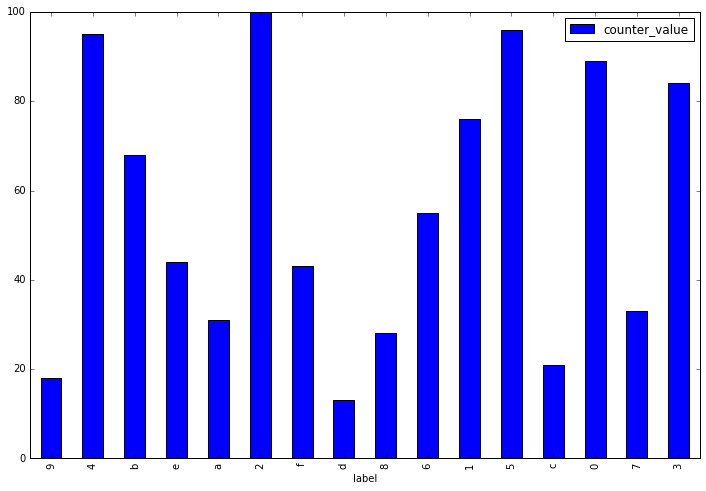

In [14]:
letters.set_index('label').plot.bar(figsize=(12, 8))

In [15]:
task_2_hex = bytearray.fromhex(task2)
task_2_hex

bytearray(b'\x1cA\x02?VK*\x13\x08$W\x0ekG\x04kR\x1f?R\x08 \x13\x18$^\x0ek@\x02&C\x07.\x13\x18>Q\x18?Z\x1f>G\x02$]K(Z\x1b#V\x19e\x13?$\x13\x19.W\x1e(VK?[\x0ekP\x04&C\x07.K\x02?JK$UK?[\x028\x13\x04%VK<VK<Z\x07\'\x13\x1e8VK$]\x072\x13\x1e;C\x0e9P\n8VK\'V\x1f?V\x198\x1fK8\\K?[\x0ekX\x0e2@\x1b*P\x0ekZ\x18k\\\x05\'JKy\x05Jkg\x04kT\x0e?\x13\x1f#Z\x18k\\\x05.\x13\x19"T\x03?\x13\n>G\x04&R\x1f"P\n\'_\x12kJ\x04>\x13\x1c"_\x07kC\x19$Q\n)_\x12k]\x0e.WK?\\K>@\x0ek@\x04&VK8\\\x19?\x13\x04-\x13\x0c.]\x0e?Z\x08kR\x07,\\\x19"G\x03&\x13C<[\x02([K<\\\x19 V\x0fkG\x03.\x13\t.@\x1fk_\n8GK2V\n9\x1aGk@\x02&F\x07*G\x0e/\x13\n%]\x0e*_\x02%TK$AK,A\n/Z\x0e%GK/V\x18(V\x05?\x1dK\x18V\x19"\\\x1e8_\x12g\x13\x1c9Z\x1f.\x13\x02?\x13\x19"T\x03?\x13\x05$DGkJ\x04>\x13\x1c"_\x07k]\x0e.WK"GK?\\K/V\x08"C\x03.AK?[\x0ek]\x0e3GK$]\x0ekR\x18kD\x0e\'_Ekq\x0e*AK"]K&Z\x05/\x1fK?[\x0e9V\x89\xcb\xaa\x18k]\x04k@\x1b*P\x0e8\x1da')

* https://en.wikipedia.org/wiki/Index_of_coincidence
* індекс співпадінь
* https://www.thonky.com/kryptos/index-of-coincidence

In [16]:
word_set = set(pd.read_csv('list_words.txt', header=None, sep='\t').fillna(' ')[0].map(str.lower))

In [17]:
def xor(string, key):
    return ''.join(list(chr(char ^ ord(key)) for char in string))

In [18]:
def text_score(text):
    score = 0
    for w in text.split():
        score = score + 1 if w in word_set else score
    return score

In [19]:
def ic(text, delta):
    if delta > 0:
        counter = 0
        shuffled_text = text[-delta:] + text[:-delta]
        for i in range(len(text)):
            counter = counter + 1 if text[i] == shuffled_text[i] else counter
        return counter / len(text)

In [20]:
def vigenere(encoded, key):
    key = key * (len(encoded) // len(key) + 1)
    key = key[:len(encoded)]
    
    return ''.join(list(chr(chr_encoded ^ ord(chr_key)) for chr_encoded, chr_key in zip(encoded, key)))

In [21]:
def choose_characters(symbls):
    score_chars = {
        chr(i): score(xor(symbls, chr(i))) for i in range(1, 255)
    }
    
    possible_comb = [
        char for char, value in score_chars.items() if value > int(len(symbls) * 0.75)
    ]
    
    return possible_comb

https://docs.python.org/2/library/itertools.html#itertools.product

In [22]:
def generate_keys(text, size):
    # size - key lenght
    possible_chars = []
    for i in range(size):
        possible_chars.append(choose_characters(text[i::size]))  
    return list(product(*possible_chars)) #cartesian product, equivalent to a nested for-loop

In [23]:
prior=(1 / 52)

ic_dict = {
    i: ic(task_2_hex, i) for i in range(1, len(task_2_hex) // 2)
}

ic_dict = {
    k: v for k, v in ic_dict.items() 
    if v > prior
}

k_len = np.min(list(ic_dict.keys()))

result = ''
res_key = None

possible_keys = generate_keys(task_2_hex, k_len)

for key in possible_keys:
    possible_decoded = vigenere(task_2_hex, key)

    if text_score(possible_decoded) > text_score(result):
        result = possible_decoded
        res_key = key

res_key = ''.join(res_key)

result, res_key

('Write a code to attack some simple substitution cipher. To reduce the complexity of this one we will use only uppercase letters, so the keyspace is only 26! To get this one right automatically you will probably need to use some sort of genetic algorithm (which worked the best last year), simulated annealing or gradient descent. Seriously, write it right now, you will need it to decipher the next one as well. Bear in mind, thereâ\x80\x99s no spaces.\n',
 'K3k')

In [24]:
file_task_3 = open('step3.txt', 'w')
file_task_3.write(result)
file_task_3.close()

# Task 3

Words: https://raw.githubusercontent.com/dwyl/english-words/master/words.txt

http://ikuz.eu/2017/06/30/breaking-substitution-cipher-using-genetic-algorithm/

In [30]:
task3 = 'EFFPQLEKVTVPCPYFLMVHQLUEWCNVWFYGHYTCETHQEKLPVMSAKSPVPAPVYWMVHQLUSPQLYWLASLFVWPQLMVHQLUPLRPSQLULQESPBLWPCSVRVWFLHLWFLWPUEWFYOTCMQYSLWOYWYETHQEKLPVMSAKSPVPAPVYWHEPPLUWSGYULEMQTLPPLUGUYOLWDTVSQETHQEKLPVPVSMTLEUPQEPCYAMEWWYOYULULTCYWPQLSEOLSVOHTLUYAPVWLYGDALSSVWDPQLNLCKCLRQEASPVILSLEUMQBQVMQCYAHUYKEKTCASLFPYFLMVHQLUHULIVYASHEUEDUEHQBVTTPQLVWFLRYGMYVWMVFLWMLSPVTTBYUNESESADDLSPVYWCYAMEWPUCPYFVIVFLPQLOLSSEDLVWHEUPSKCPQLWAOKLUYGMQEUEMPLUSVWENLCEWFEHHTCGULXALWMCEWETCSVSPYLEMQYGPQLOMEWCYAGVWFEBECPYASLQVDQLUYUFLUGULXALWMCSPEPVSPVMSBVPQPQVSPCHLYGMVHQLUPQLWLRPHEUEDUEHQMYWPEVWSSYOLHULPPCVWPLULSPVWDVWGYUOEPVYWEKYAPSYOLEFFVPVYWETULBEUF'

In [31]:
task_3_encoded = task3.lower()

In [32]:
def decode_subst(s, key_to_decode={}):
    return ''.join(key_to_decode.get(x, '?') for x in s)

In [33]:
sizes_set = (1, 2, 3, 4, 5, 6)

In [34]:
def weight(sizes=sizes_set): 
    words = pd.read_csv('words_frequency_dict.txt', sep=' ', header=None)
    
    words = words.fillna(' ')
    words[0] = words[0].map(str.lower)
    words[1] = words[1] / words[1].sum()

    total_prob = defaultdict(float)
    n_gram_counter = defaultdict(int)
    
    for _, row in words.iterrows():
        w, probability = row[0], row[1]
        
        for n_gr_size in sizes:
            for i in range(len(w) - n_gr_size + 1):
                key = w[i:(i + n_gr_size)]

                if not all(x in charset for x in key):
                    continue

                total_prob[key] += probability
                n_gram_counter[key] += 1

    w = {
        i: total_prob[i] / n_gram_counter[i] for i in n_gram_counter.keys()
    }
    
    return w

In [27]:
ngram_weights = weight()

In [35]:
def score_subst(text, n_grams, weights_dict):
    score = 0.
    
    for t, n_gr_size in enumerate(n_grams):
        for i in range(len(text) - n_gr_size + 1):
            score += weights_dict.get(text[i:(i + n_gr_size)], 0.)
            
    return score

def key_dict_rand():
    initial_charset = set(charset_lower)
    initial_dict = {}
    
    for c in set(charset_lower):
        decode = np.random.choice(list(initial_charset))        
        initial_charset.remove(decode)
        
        initial_dict[c] = decode
    
    return initial_dict


def key_dict_update(key_dicts, key, val):
    new = [k for k, v in key_dicts.items() if v == val][0]
    key_dicts[key], key_dicts[new] =  key_dicts[new], key_dicts[key]
    
    return key_dicts

def init_population(text, best_char_amount):
    chars_freq = 'etaoinsrhdluc'
        
    chars_freq = chars_freq[:best_char_amount]
    # r-length tuples, all possible orderings, no repeated elements
    chars_freq_comb = [''.join(p) for p in permutations(chars_freq)]
    
    top_symbols_in_s = ''.join([x[0] for x in sorted(Counter(text).items(), key=lambda x: -x[-1])])[:best_char_amount]
    
    population = [
        key_dict_rand()
        for _ in range(len(chars_freq_comb))
    ]
    
    for i in range(len(population)):
        for c1, c2 in zip(top_symbols_in_s, chars_freq_comb[i]):
            key_dict_update(population[i], c1, c2)
            
    return population

def softmax(score_vals):
    score_vals = np.array(score_vals)
    e_x = np.exp(score_vals - np.max(score_vals))
    return e_x / e_x.sum(axis=0)


def crossover(key_d, scores, population_size):
    p_arr = softmax(scores)
    p_arr = np.cumsum(p_arr)
    population = []
    
    for _ in range(population_size):
        # get parents based on scores
        x, y = key_d[bisect_left(p_arr, np.random.rand())], key_d[bisect_left(p_arr, np.random.rand())]
        next_c = x.copy()
        
        for k in next_c.keys():
            key_dict_update(next_c, k, np.random.choice([x, y])[k])
            
        population.append(next_c)
        
    return population


def mutate(key_d, bound_prob=0.25):
    for i in range(len(key_d)):
        while np.random.rand() < bound_prob:
            pos_1 = np.random.choice(list(charset_lower))
            pos_2 = np.random.choice(list(charset_lower))            
            key_dict_update(key_d[i], pos_1, pos_2)               
    return key_d

def decode_algorithm(encoded, best_char_amount, n_grams_size, ngram_weights, 
                     wait_counter=50, cr_part=0.75, max_iters=500):# 0 500
    
    population = init_population(encoded, best_char_amount)
    
    #print(len(population)) if 6, len(population) = 720
    
    score_val = -1
    res = None
    count_temp = wait_counter
    
    while max_iters:
        scores = [
            score_subst(decode_subst(encoded, key_to_decode=x), n_grams_size, ngram_weights) for x in population
        ]
        
        identifiers = np.argsort(scores)
        
        if scores[identifiers[-1]] <= score_val:
            if count_temp  == 0 :
                break
            else:
                if  scores[identifiers[-1]] == score_val:
                    res = population[identifiers[-1]]
                    
                count_temp -= 1
           
        else:
            count_temp = wait_counter

        score_val = scores[identifiers[-1]]
        res = population[identifiers[-1]]
                
        identifiers = identifiers[int(len(scores) * cr_part):]
        
        population = crossover([population[i] for i in identifiers], 
                               [scores[i] for i in identifiers],
                               len(population))
        population = mutate(population)
        max_iters -= 1
        
    decoded = " ".join(wordninja.split(decode_subst(encoded, key_to_decode=res)))
        
    return decoded, res

In [36]:
task_3_decoded, decode_dict = decode_algorithm(encoded=task_3_encoded, best_char_amount=6, 
                                               n_grams_size=sizes_set, ngram_weights=ngram_weights,)

In [37]:
task_3_decoded

'add the ability to decipher any kind of poly alphabetic substitution ciphers the one used in the ciphertexts here has twenty six independent randomly chosen mono alphabetic substitution patterns for each letter from english alphabet it is clear that you can no more rely on the same simple routine of guessing the key by exhaustive search which you probably used to decipher previous paragraph will the indexof coincidence still work as a suggestion you can try to divide the message in parts by the number of characters in a key and apply frequency analysis to each of them can you find away to use higher order frequency statistics with this type of cipher the next paragraph contains some pretty interesting information about some additional reward'

In [39]:
decode_dict

{'a': 'u',
 'b': 'w',
 'c': 'y',
 'd': 'g',
 'e': 'a',
 'f': 'd',
 'g': 'f',
 'h': 'p',
 'i': 'v',
 'j': 'j',
 'k': 'b',
 'l': 'e',
 'm': 'c',
 'n': 'k',
 'o': 'm',
 'p': 't',
 'q': 'h',
 'r': 'x',
 's': 's',
 't': 'l',
 'u': 'r',
 'v': 'i',
 'w': 'n',
 'x': 'q',
 'y': 'o',
 'z': 'z'}

add the ability to decipher any kind of poly alphabetic substitution ciphers the one used in the ciphertexts here has twenty six independent randomly chosen mono alphabetic substitution patterns for each letter from english alphabet it is clear that you can no more rely on the same simple routine of guessing the key by exhaustive search which you probably used to decipher previous paragraph will the indexof coincidence still work as a suggestion you can try to divide the message in parts by the number of characters in a key and apply frequency analysis to each of them can you find away to use higher order frequency statistics with this type of cipher the next paragraph contains some pretty interesting information about some additional reward